In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings('ignore')

# save figure function
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png") 
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png')

# Centroids from K-Means

## Overview -- Unsupervised learning: Discovering Groups (Clustering)

We will be exploring clustering techniques to group our documents into common topics based on similarity.



# Introduction

### Understanding the Centroids from K-Means

Applying K-means to TF-IDF or bag-of-words features produces topic centroids. 

This repo contains a 'articles.pkl' file that has 1405 articles from 'Arts','Books','Business Day', 'Magazine', 'Opinion', 'Real Estate', 'Sports', 'Travel', 'U.S.', and 'World'. (This is a [pickled](https://docs.python.org/2/library/pickle.html) data frame [data frame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html#pandas.read_pickle).

We will apply kmeans clustering to the `articles.pkl`. Using pandas' `pd.read_pickle()` and [scikit-learn's](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) module.


![kmean](images/kmeans.gif)
 (refresh/click to see animation)
 
 [Image Source](http://shabal.in/visuals.html)

### Import Data and apply KMeans

Centroids are vectors that we will map back into our 'word space'. Each feature/dimension of the centroid vector is representing the "average" article or the average occurrences of words for that cluster.

In [2]:

articles_df = pd.read_pickle("data/articles.pkl")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Print centroids as vectors

In [3]:

print("\n2) cluster centers:")
print(kmeans.cluster_centers_)


2) cluster centers:
[[0.         0.01865588 0.         ... 0.         0.         0.        ]
 [0.         0.00545196 0.         ... 0.         0.00181685 0.        ]
 [0.00043201 0.0055878  0.         ... 0.         0.         0.00245871]
 ...
 [0.         0.00051701 0.         ... 0.         0.         0.        ]
 [0.         0.00727365 0.         ... 0.0003725  0.00049131 0.        ]
 [0.         0.00874483 0.         ... 0.         0.         0.        ]]


### Print centroids as words

In [4]:
# Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n3) top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}, {', '.join(features[i] for i in centroid)}")


3) top features (words) for each cluster:
0, health, care, insurance, exchange, law, coverage, federal, plan, affordable, employee
1, attack, mall, shabab, kenya, said, kenyan, killed, militant, somalia, official
2, game, team, season, said, player, yard, cup, league, coach, touchdown
3, yankee, rivera, game, inning, season, pettitte, run, hit, said, league
4, mr, said, new, year, company, people, state, ms, like, city
5, iran, rouhani, iranian, nuclear, mr, obama, israel, netanyahu, united, president
6, republican, government, party, house, mr, shutdown, senate, debt, said, democrat
7, syria, chemical, weapon, syrian, united, said, russia, state, mr, nation


### Try fewer features

We will limit the number of features included in the matrix which will help reduce noice and make the centroids more sensible for interpretation. We will limit the `max_features`.

In [5]:
# Limit the number of features and see if the words of the topics change.
feats = 500
vectorizer = TfidfVectorizer(stop_words='english', max_features=feats)
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n4) top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}: {', '.join(features[i] for i in centroid)}")



4) top features for each cluster with 1000 max features:
0: said, new, year, company, percent, sept, state, people, million, like
1: republican, health, government, house, care, shutdown, senate, obama, mr, law
2: iran, rouhani, iranian, nuclear, mr, obama, israel, united, president, nation
3: game, team, season, said, player, yard, cup, league, coach, play
4: mr, music, art, ms, work, song, dance, opera, like, museum
5: said, attack, police, official, people, government, killed, syria, military, united
6: mr, said, court, party, judge, state, case, government, year, political
7: yankee, game, rivera, inning, season, run, hit, said, league, team


### Get random samples for each group

An alternative to finding out what each cluster represents is to look at the articles that are assigned to it.  We will Print out the titles of a random sample of the articles assigned to each cluster to get a sense of the topic.

In [6]:
print("\n5) random sample of titles in each cluster")
assigned_cluster = kmeans.transform(X).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_articles = np.random.choice(cluster, 3, replace=False)
    print(f"cluster {i}:")
    for article in sample_articles:
        print(f"    {articles_df.loc[article]['headline']}")


5) random sample of titles in each cluster
cluster 0:
    S.&P. Falls for a 5th Day As Federal Shutdown Looms
    Markets Fall as Investors Rehash the Fed&#8217;s Decision
    A Wave of Sewing Jobs as Orders Pile Up at U.S. Factories
cluster 1:
    Q. and A. on the Government Shutdown in the U.S.
    A Different Way for Republicans to Handle Tea Party Zeal
    Day 1: The New World of Health Care
cluster 2:
    Hassan Does Manhattan
    Israel and Others in Mideast View Overtures of U.S. and Iran With Suspicion
    Israeli Leader Excoriates New President of Iran
cluster 3:
    Brodeur’s Tenure Stands Out in Landscape Rich With Resilience
    The Cup May Stay, but There’s No Going Back on Speed
    N.C.A.A. Begins to Ease Penn State Penalties
cluster 4:
    A Museum Works to Reinvent Itself, as Well as the American West
    Art Collections a Click Away
    Knock, Knock, Knockin’ on Nobel’s Door
cluster 5:
    Baylor Football Player Arrested
    The White Gold of Jihad
    Kenya Forces S

### Set k = # sections.  Find and count sections for each group



In [7]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)


In [8]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = articles_df.loc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print(f"Cluster {i}:")
    for j in range (len(most_common)):
        print(f"     {most_common[j][0]} ({most_common[j][1]} articles)")

Cluster 0:
     World (117 articles)
     U.S. (4 articles)
     Opinion (2 articles)
     Business Day (2 articles)
     Sports (1 articles)
Cluster 1:
     U.S. (31 articles)
     Business Day (2 articles)
     Opinion (1 articles)
Cluster 2:
     Sports (30 articles)
Cluster 3:
     World (22 articles)
     Opinion (3 articles)
     U.S. (1 articles)
Cluster 4:
     Arts (77 articles)
     Business Day (13 articles)
     Opinion (3 articles)
     World (1 articles)
Cluster 5:
     Sports (155 articles)
     Arts (4 articles)
     World (2 articles)
     Opinion (1 articles)
Cluster 6:
     Sports (34 articles)
     World (26 articles)
     Business Day (24 articles)
     Opinion (21 articles)
     Arts (12 articles)
     U.S. (3 articles)
Cluster 7:
     Business Day (29 articles)
     World (5 articles)
     Opinion (4 articles)
     U.S. (3 articles)
     Arts (1 articles)
Cluster 8:
     Arts (22 articles)
     Opinion (1 articles)
Cluster 9:
     World (42 articles)
     U.S. (2

## Clustering by cross sectional topics

We can cluster with only a subset of original sections to cluster a topic by cross sectional topics. We can show that clustering by sports can return articles on say the economics or arts of sports. This, however is not a perfect map.

In [9]:
mask = articles_df['section_name'].isin(['Sports', 'Arts', 'Business Day'])
three_articles_df = articles_df[mask]
kmeans = KMeans(n_clusters=3)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(three_articles_df['content'])
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print(" Top topics for each cluster")
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = three_articles_df.iloc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print(f"Cluster {i}:")
    for j in range (len(most_common)):
        print(f"     {most_common[j][0]} ({most_common[j][1]} articles)")

 Top topics for each cluster
Cluster 0:
     Arts (114 articles)
     Business Day (70 articles)
     Sports (44 articles)
Cluster 1:
     Sports (46 articles)
Cluster 2:
     Sports (130 articles)
     Arts (2 articles)


# Hierarchical Clustering

Now we are going to leverage [Scipy](http://www.scipy.org/) to perform [hierarchical clustering](http://en.wikipedia.org/wiki/Hierarchical_clustering).



Hierarchical clustering is more computationally intensive than Kmeans.  Also it is hard to visualize the results of a hierarchical clustering if you have too much data (since it represents its clusters as a tree). So we will create a subset of the original articles by filtering the data set to contain at least one article from each section and at most around 100 total articles.

    One issue with text (especially when visualizing/clustering) is high dimensionality.  Any method that uses distance metrics is susceptible to the [curse of dimensionality](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/).



In [10]:
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name']==category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.loc[small_mask]

In [11]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=feats)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()

### Get distances using pdist

The first step to using `scipy's` Hierarchical clustering is to first find out how similar our vectors are to one another.  To do this we use the `pdist` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) to compute a similarity matrix of our data (pairwise distances).  First we will use cosine distance and examine the shape of what is returned.



In [12]:
distances = pdist(small_X.todense(), metric='Cosine')
# now get distances

### Transform into square form

The `pdist` function will return a flatten vector.  So we will use scipy's [squareform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html) function to get our flattened vector of distances back into a square matrix.



In [13]:
distxy = squareform(distances)

### Pass this matrix into scipy's linkage function to compute our hierarchical clusters.

Now that we have a square similarity matrix we can start to cluster. We will pass this matrix into scipy's `linkage` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) to compute our hierarchical clusters.



In [14]:
link = linkage(distxy, method='complete')

### Using scipy's dendrogram function plot the linkages as a hierachical tree

We in theory have all the information about our clusters but it is basically impossible to interpret in a sensible manner.  Thankfully scipy also has a function to visualize this madness.  We will use scipy's `dendrogram` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) to plot the linkages as a hierachical tree.

_Note: [Here](http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week3/hierarchical_clustering.ipynb) is a very simple example of putting all of the pieces together_



Saving figure images/unlabelled_dend


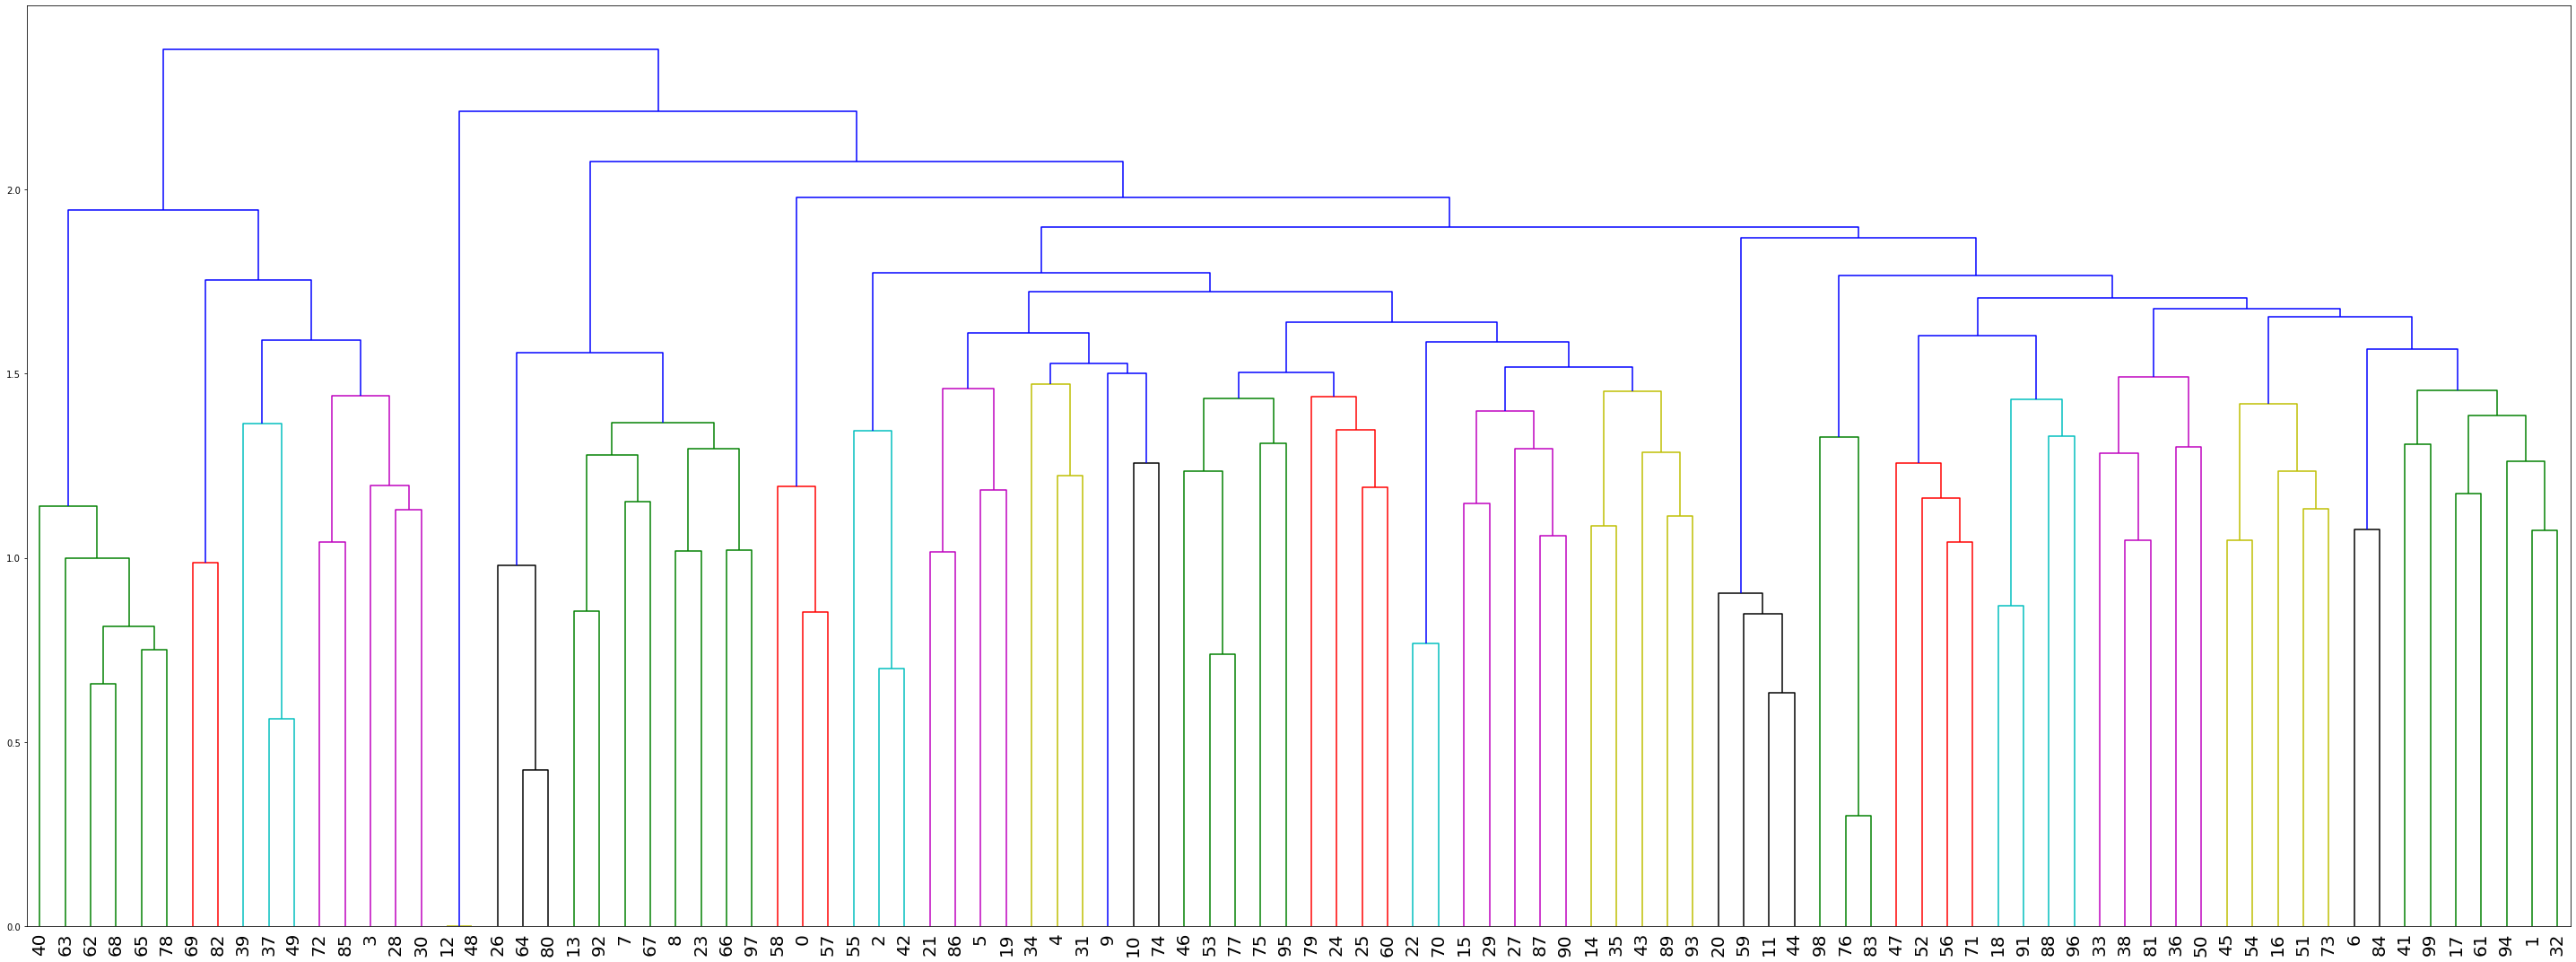

In [15]:
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20, ax=ax)
save_fig('images/unlabelled_dend')
plt.show()


## HIERARCHICAL TOPICS

### Add labels

Saving figure images/labelled_dend


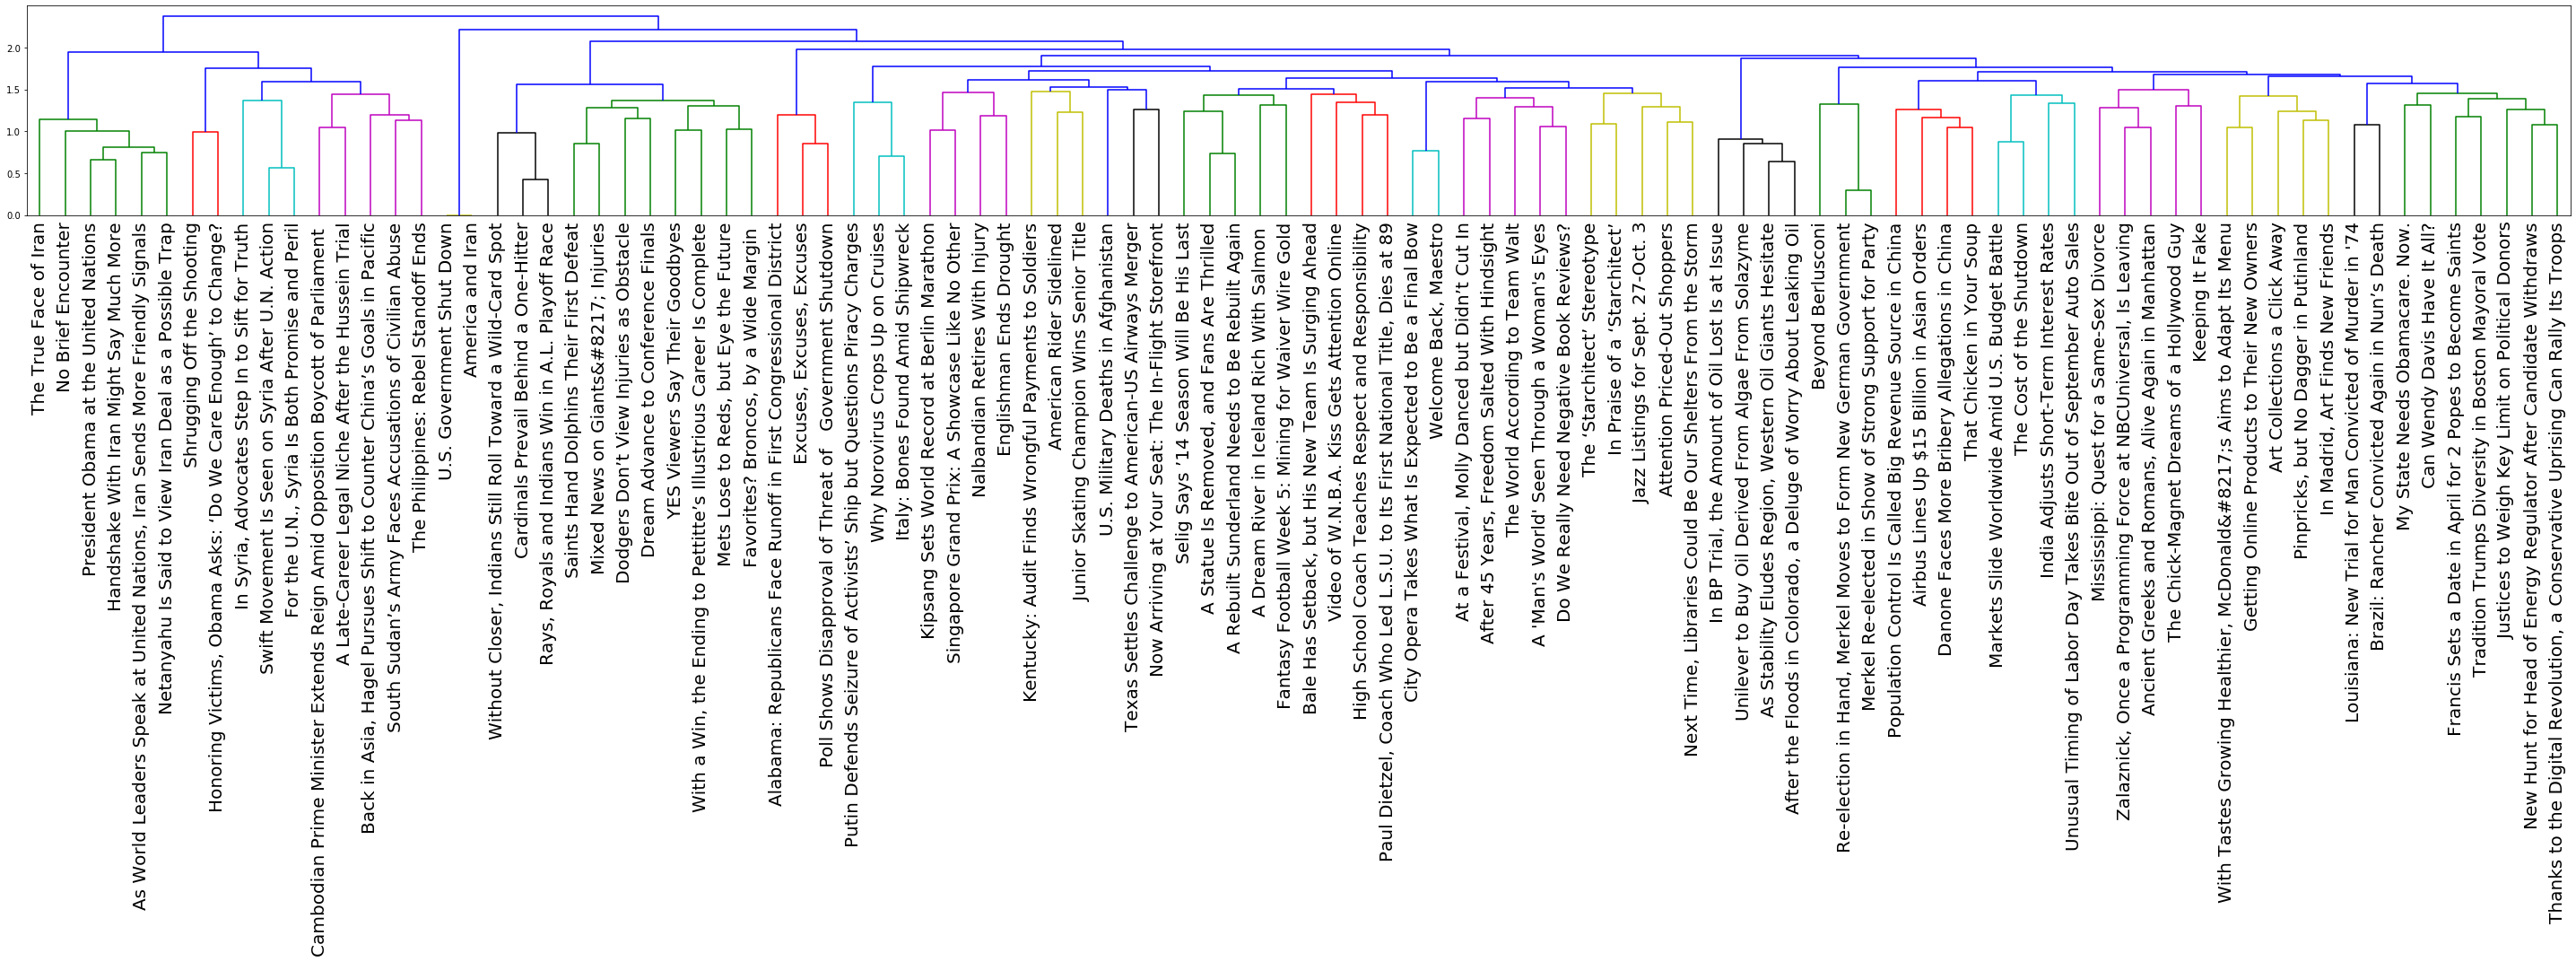

In [16]:

fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20,
                    labels=small_df['headline'].values, ax=ax)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
save_fig('images/labelled_dend')
plt.show()


### Label each point with the title and section.

Saving figure images/title_sec_dend


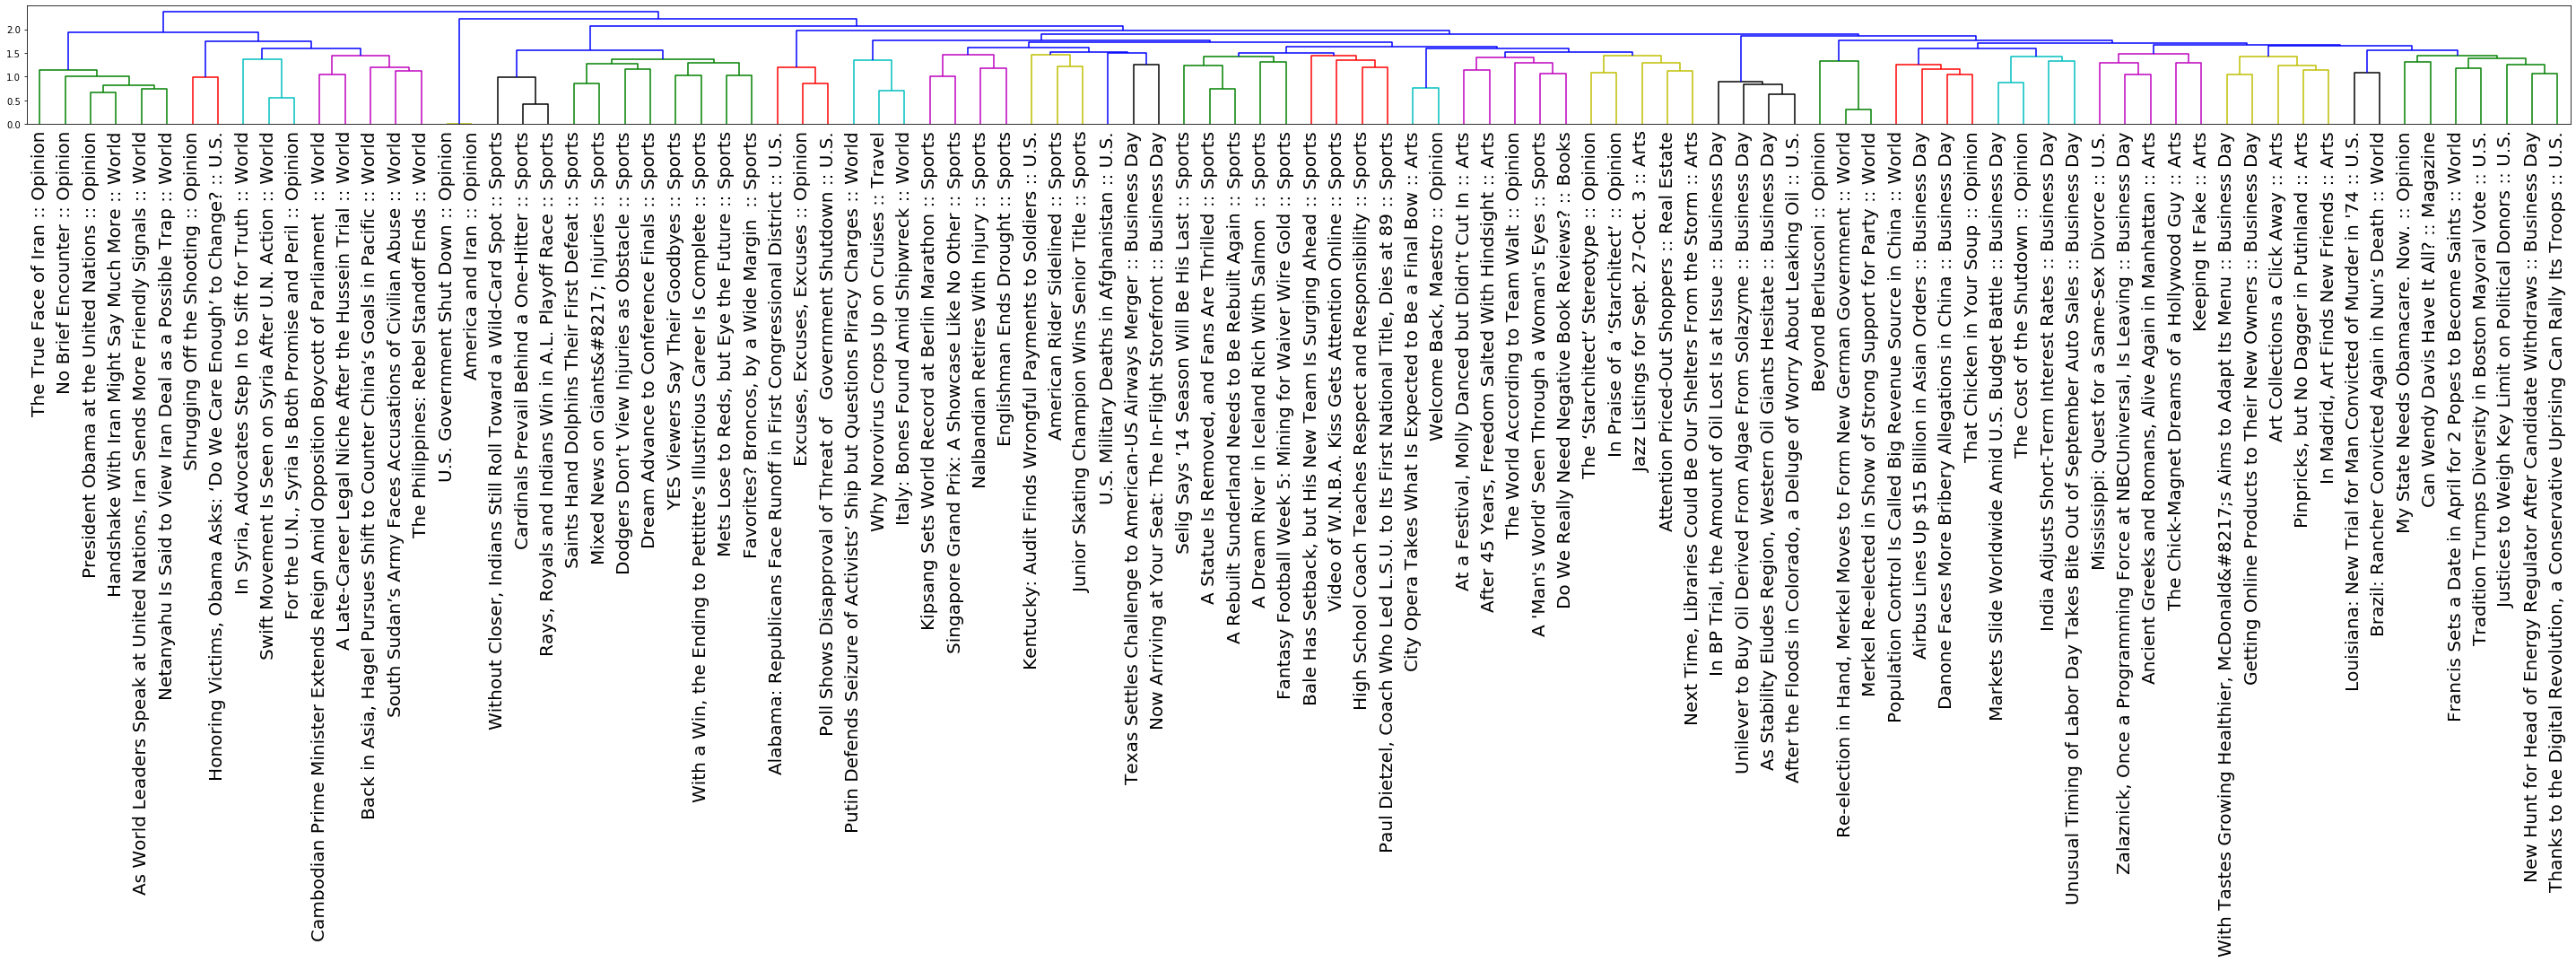

In [17]:
labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20,
                    labels=labels, ax=ax)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
save_fig('images/title_sec_dend')
plt.show()

### Explore different clusters on a per section basis.

Saving figure images/cluster_sections


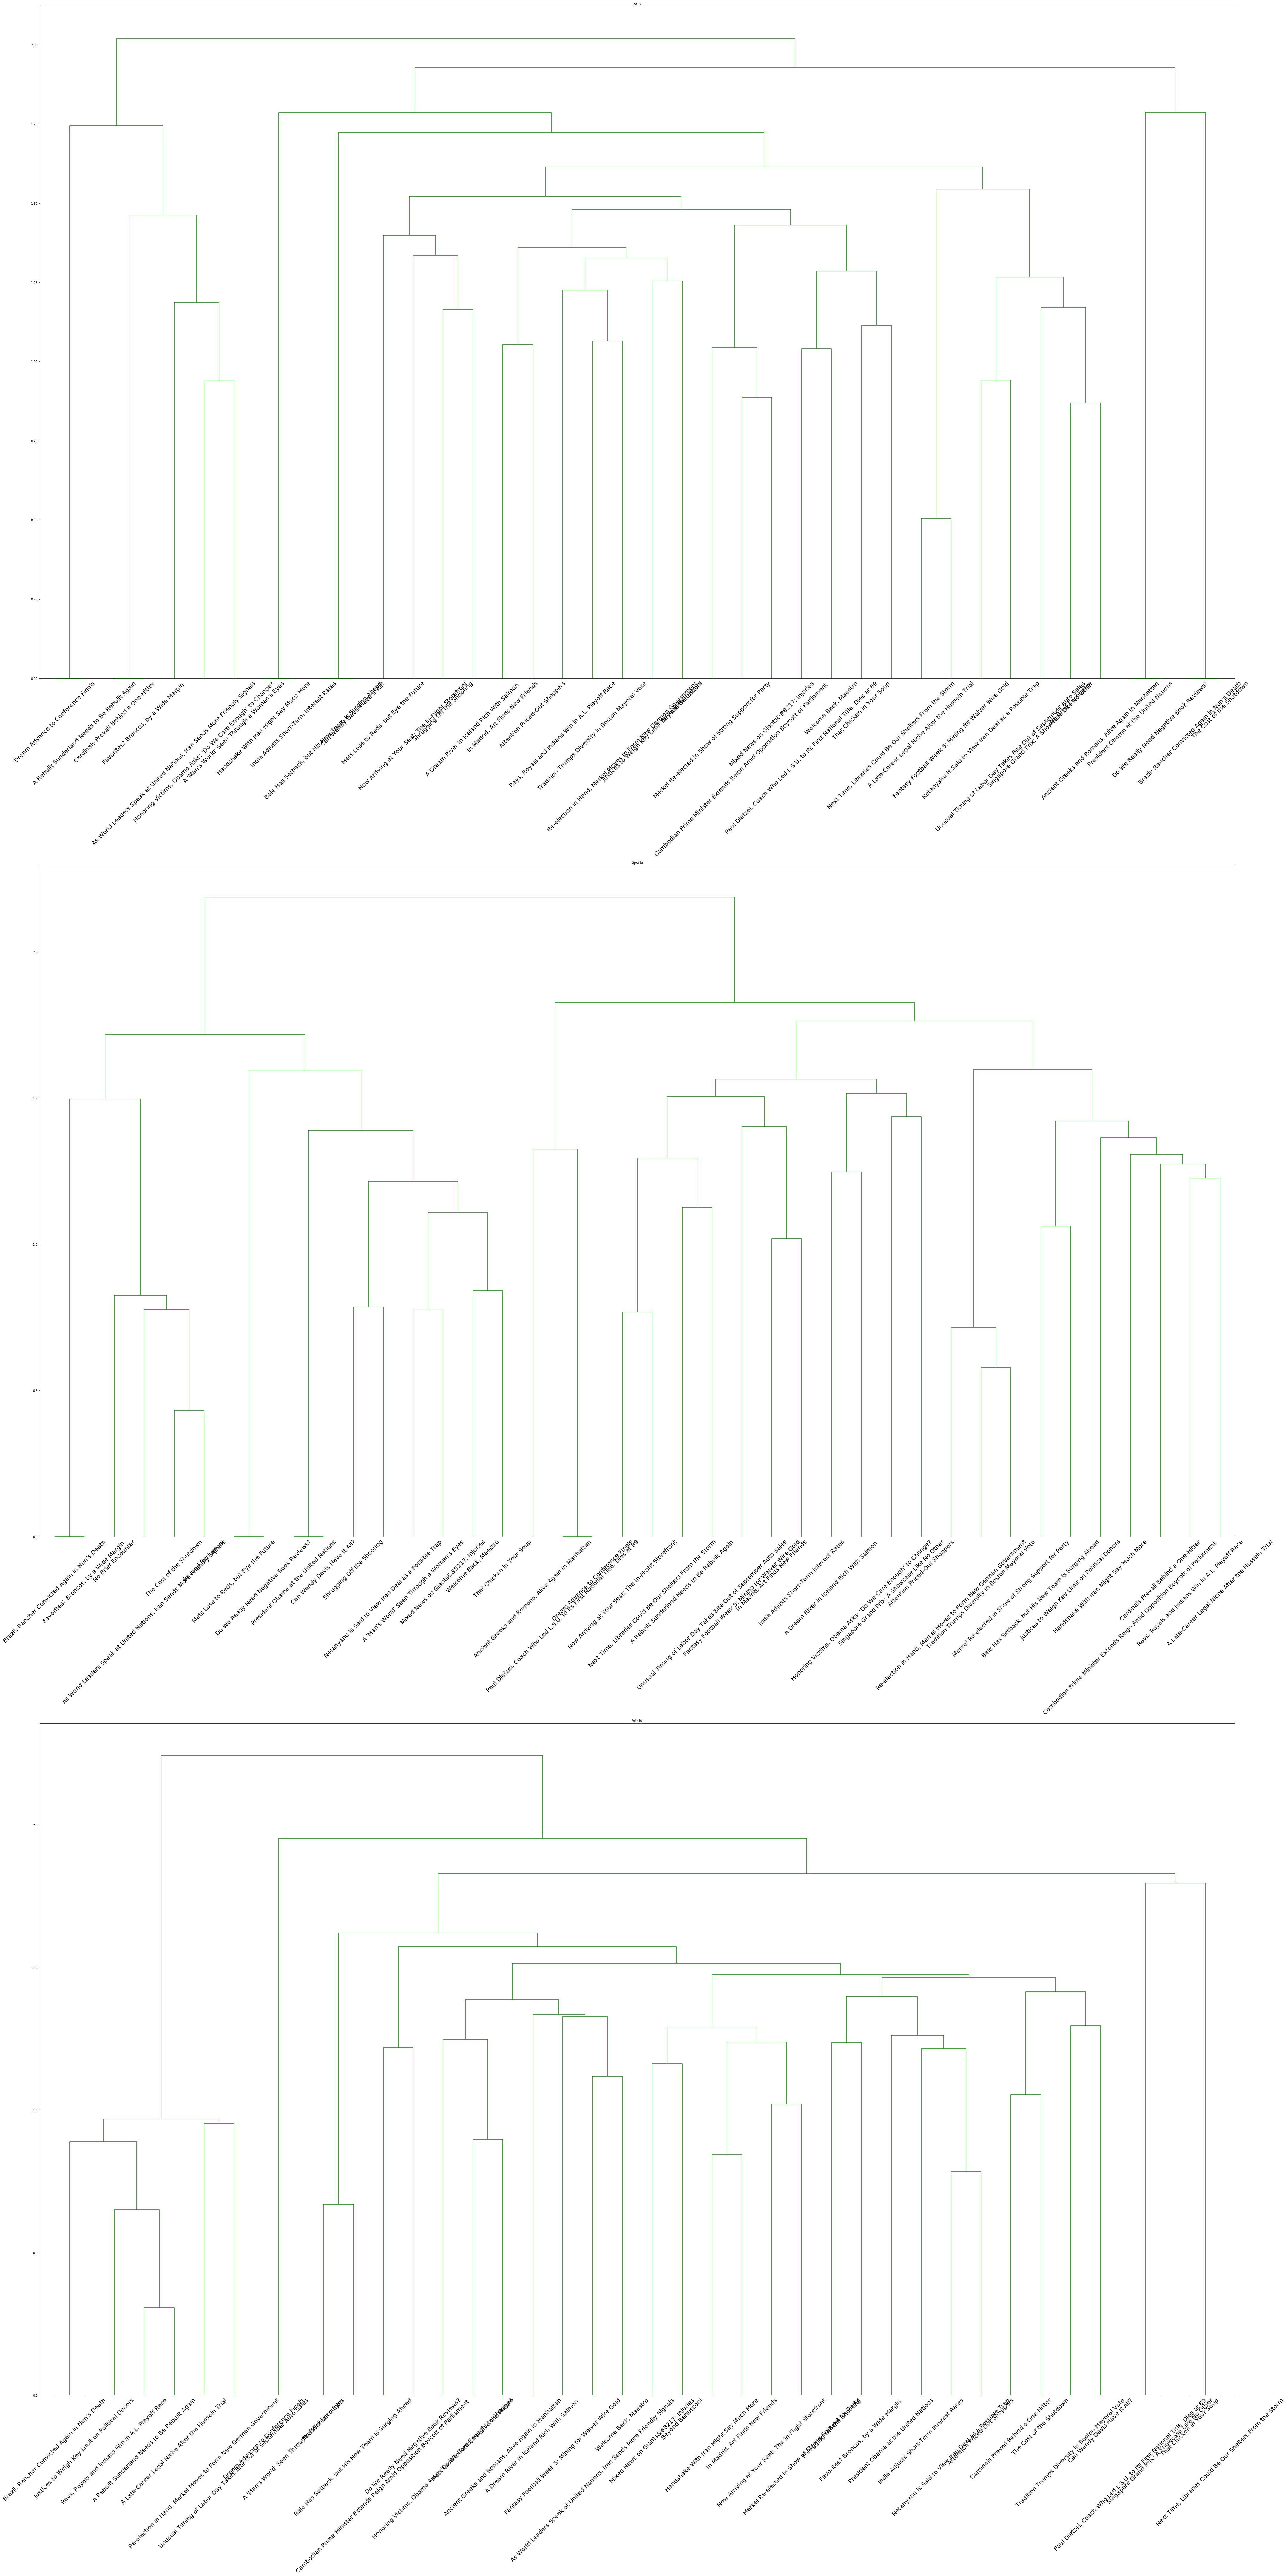

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(60,120))

for i, category in enumerate(['Arts', 'Sports', 'World']):
    cat_indices = articles_df[articles_df['section_name']==category].index
    indices = np.random.choice(cat_indices, 40)
    cat_df = articles_df.loc[indices]
    vectorizer = TfidfVectorizer(stop_words='english', max_features=feats)
    cat_X = vectorizer.fit_transform(cat_df['content'])
    distxy = squareform(pdist(cat_X.todense(), metric='cosine'))

    dendro = dendrogram(linkage(distxy, method='complete'),
                        color_threshold=4,
                        leaf_font_size=20,
                        labels=small_df['headline'].values, ax=ax[i])
    ax[i].set_title(category)
fig.tight_layout() 
plt.subplots_adjust(top=.95, bottom=0.5, left=0.05, right=0.99)
save_fig('images/cluster_sections')
plt.show()

### Euclidean Distance:


Saving figure images/euclidean


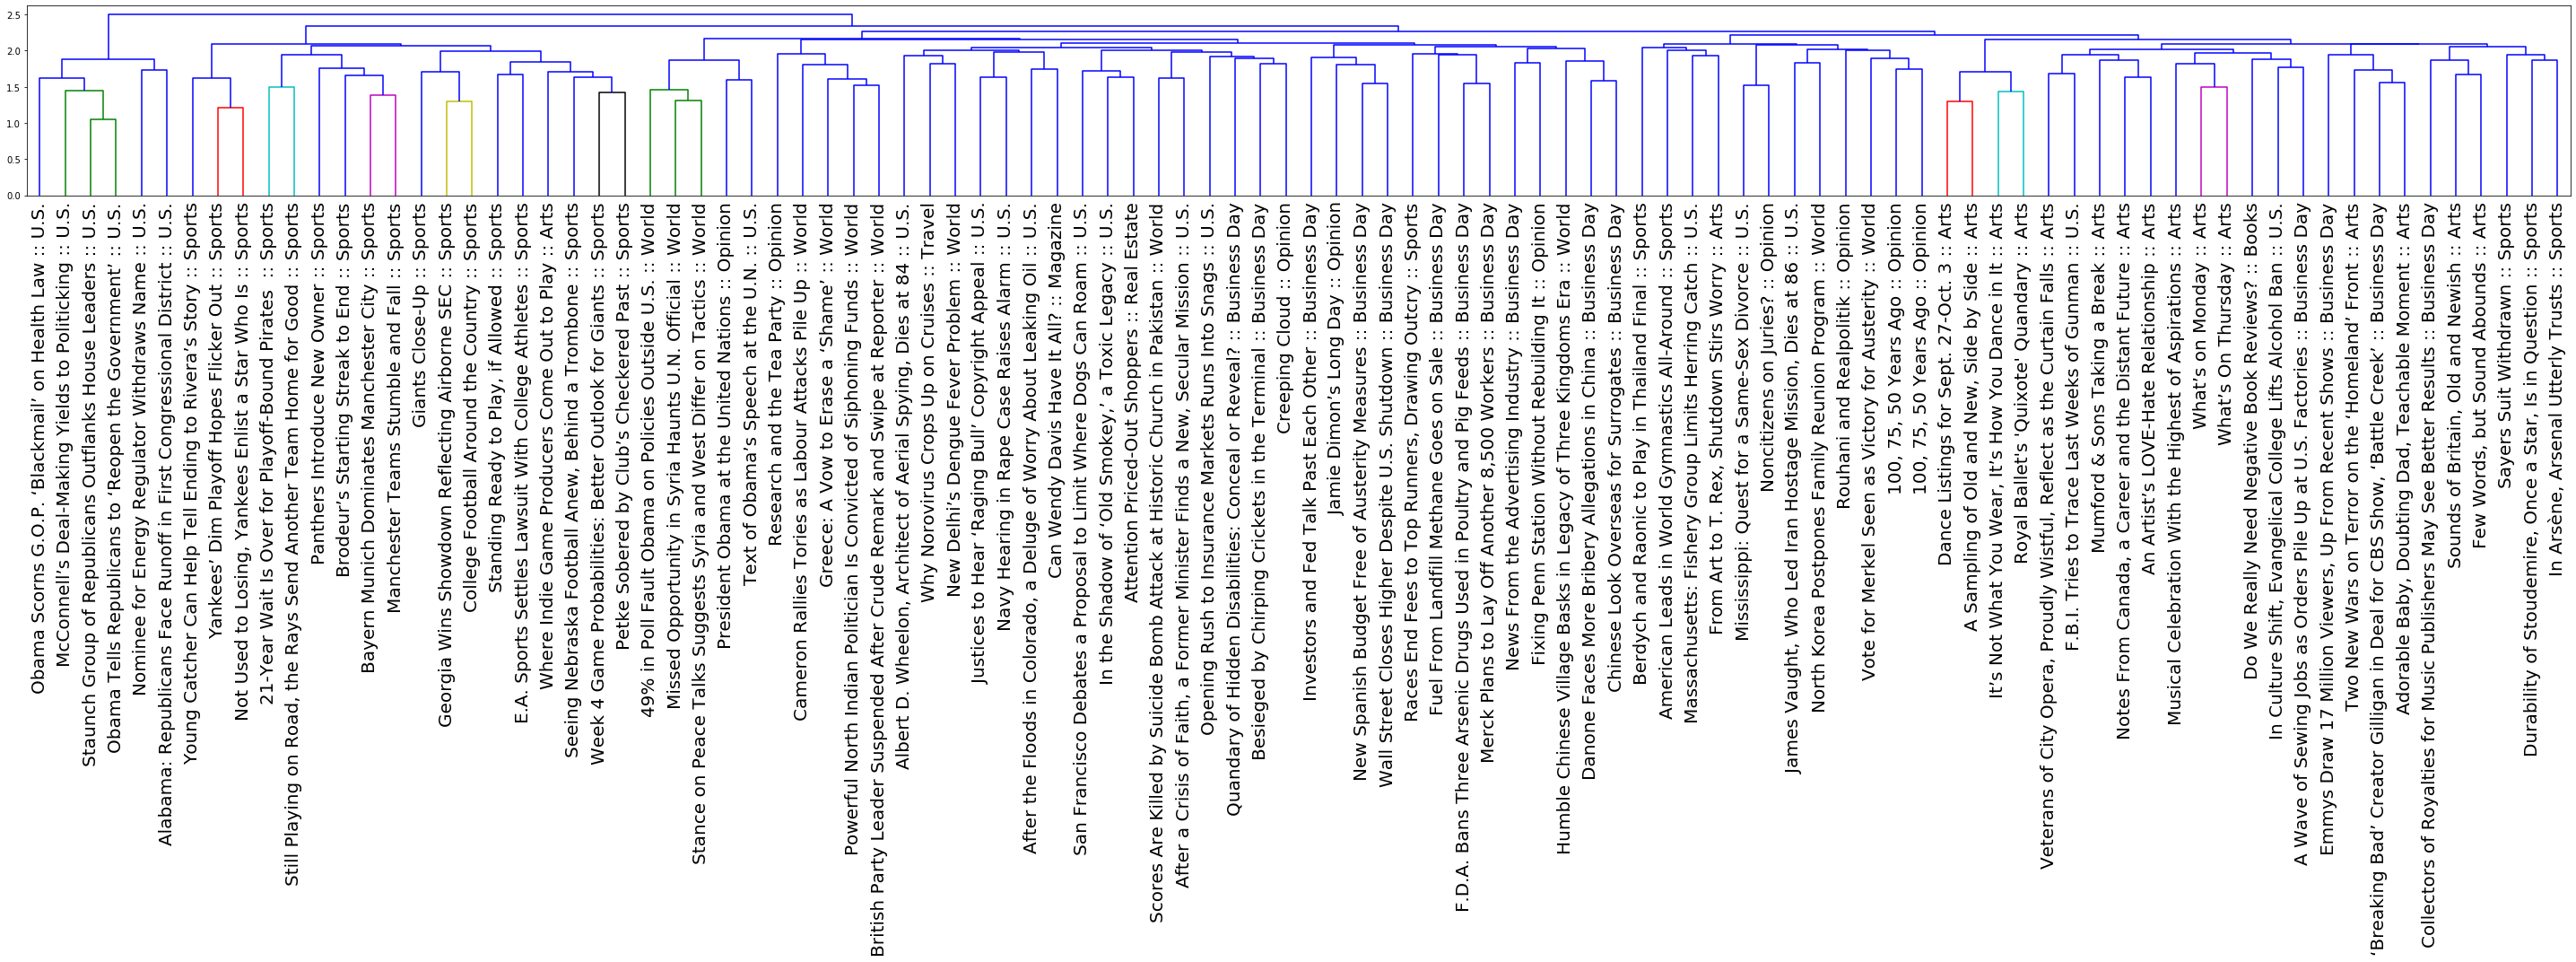

In [19]:
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name']==category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.loc[small_mask]
vectorizer = TfidfVectorizer(stop_words='english', max_features=feats)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()
distances = pdist(small_X.todense(), metric='Euclidean')

distxy = squareform(distances)
link = linkage(distxy, method='complete')

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20,
                    labels=labels, ax=ax)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
save_fig('images/euclidean')
plt.show()

### Pearson correlation

Saving figure images/correlation


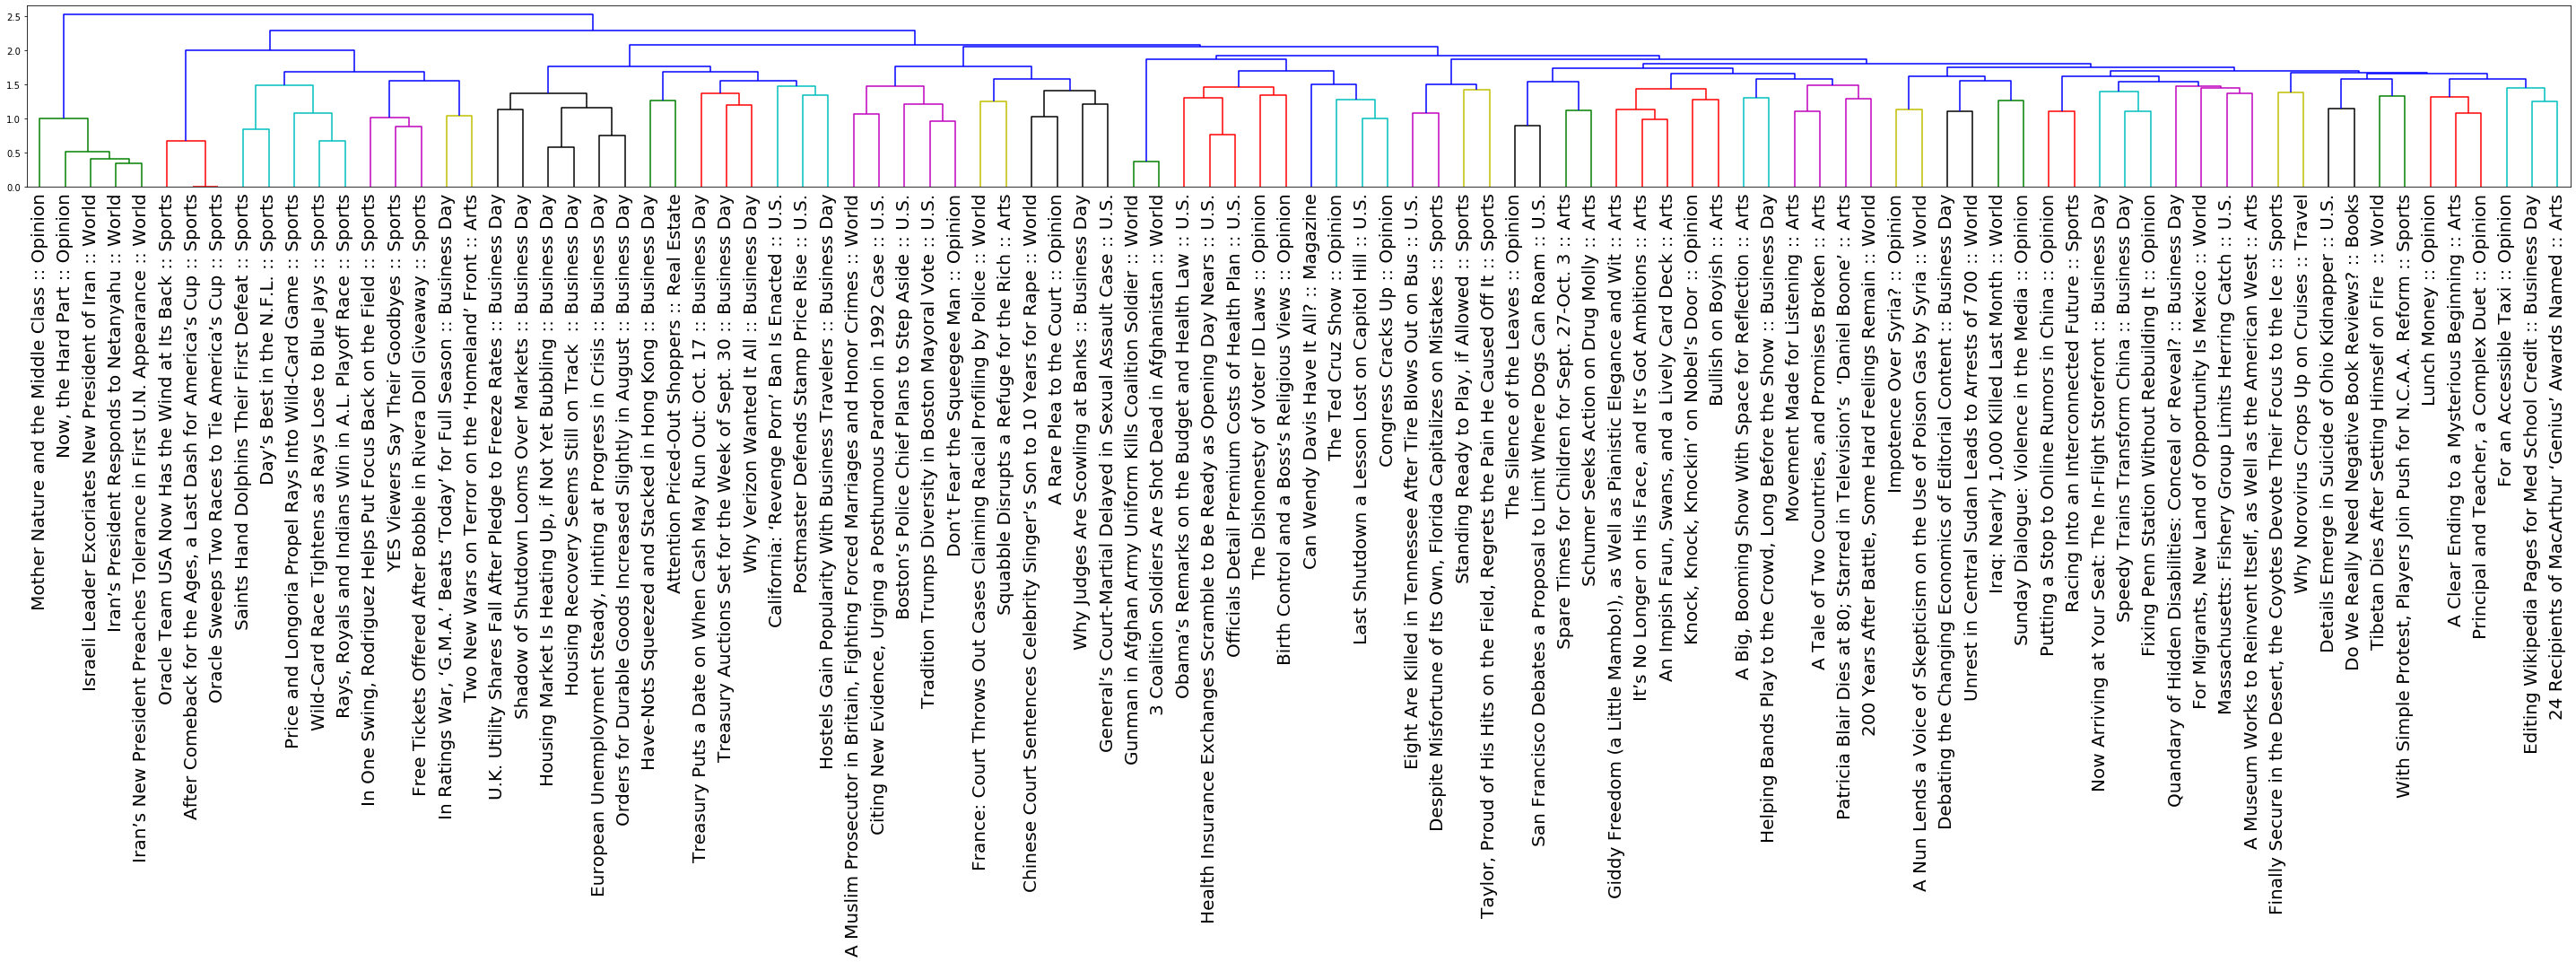

In [20]:
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name']==category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.loc[small_mask]
vectorizer = TfidfVectorizer(stop_words='english', max_features=feats)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()
distances = pdist(small_X.todense(), metric='Correlation')

distxy = squareform(distances)
link = linkage(distxy, method='complete')

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20,
                    labels=labels, ax=ax)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
save_fig('images/correlation')
plt.show()

### Jaccard distance

Saving figure images/jaccard


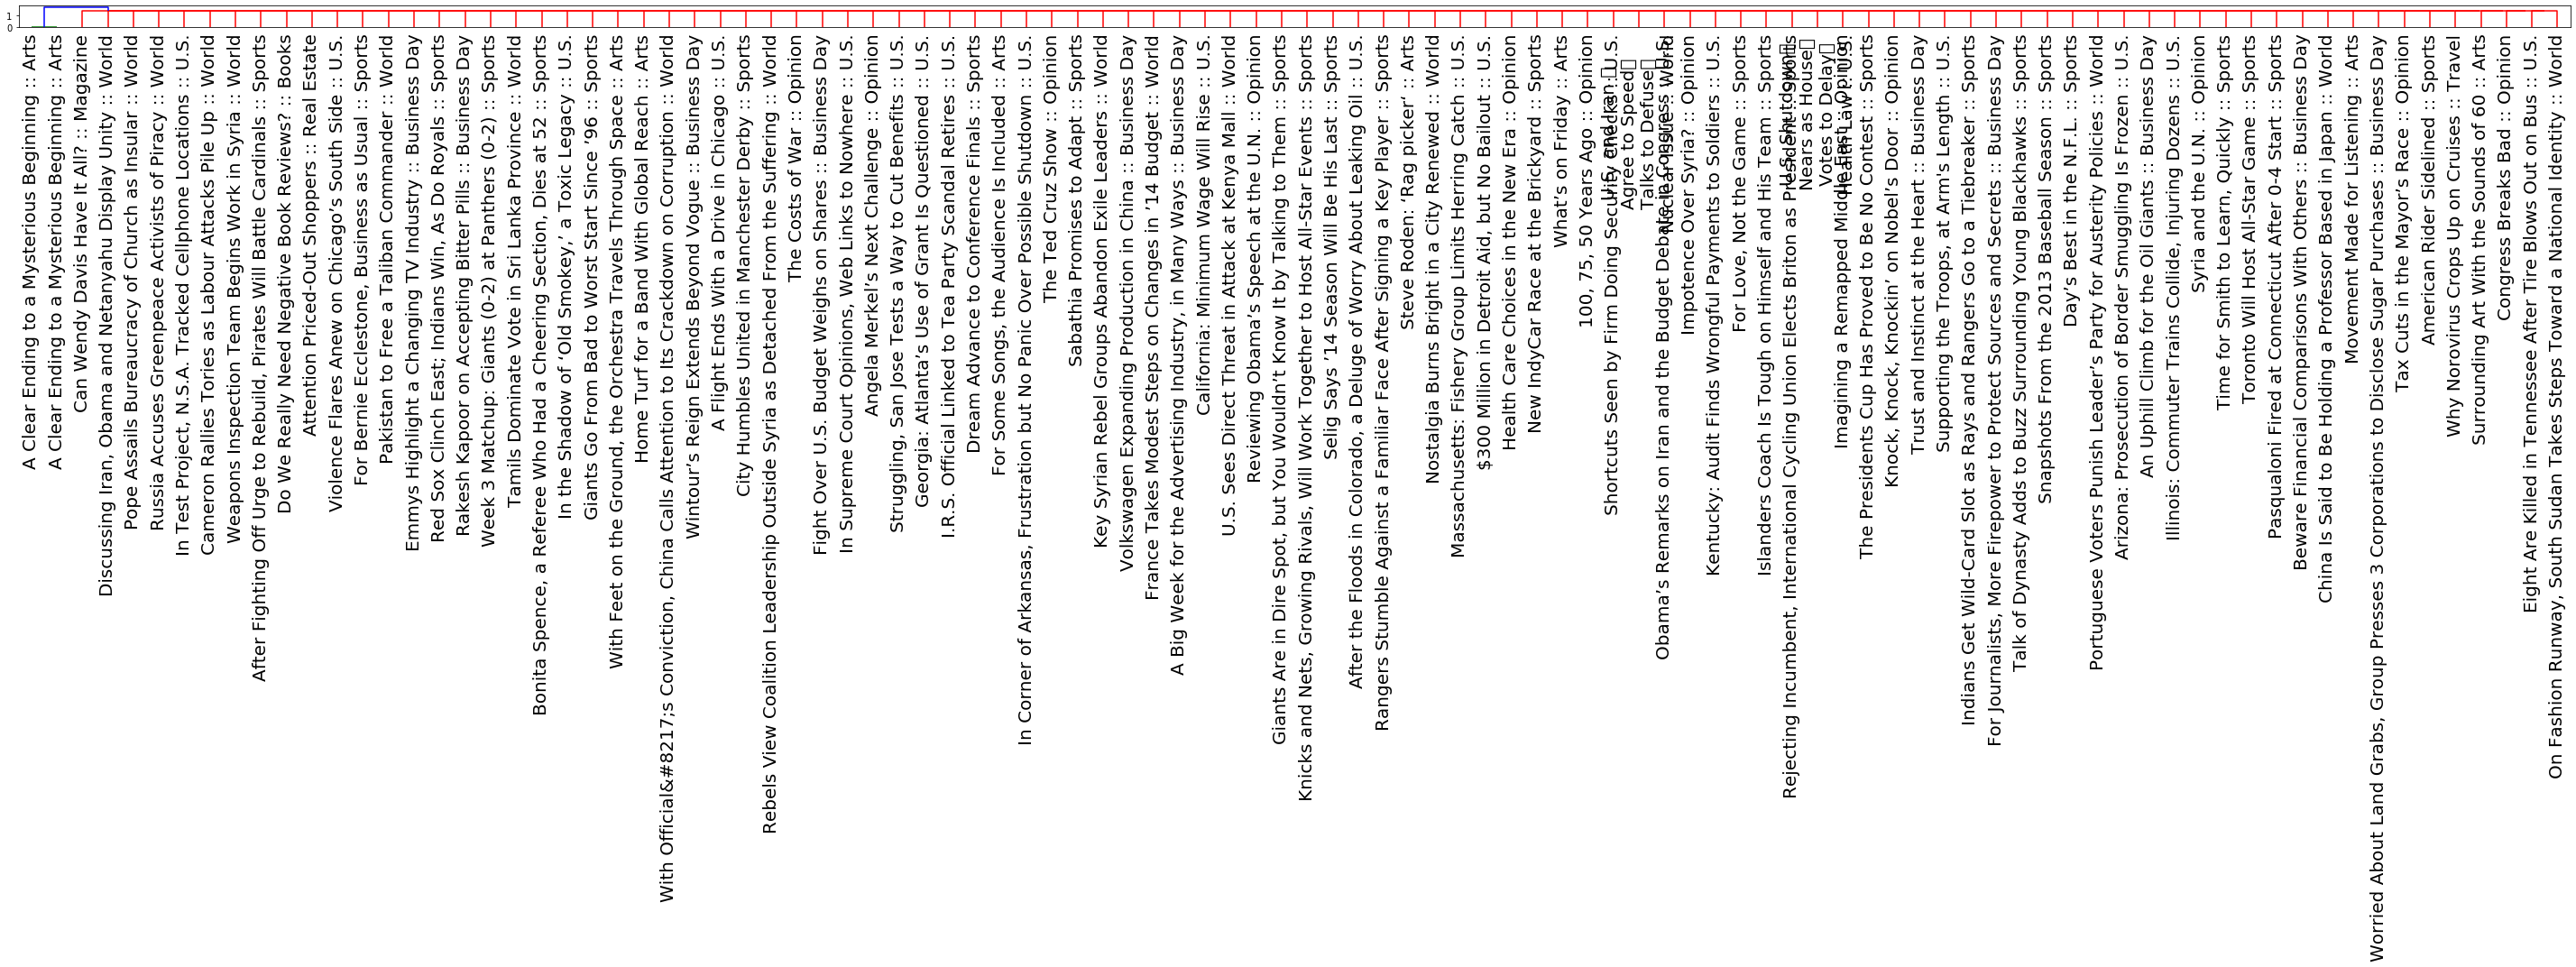

In [21]:
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name']==category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.loc[small_mask]
vectorizer = TfidfVectorizer(stop_words='english', max_features=feats)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()
distances = pdist(small_X.todense(), metric='Jaccard')

distxy = squareform(distances)
link = linkage(distxy, method='complete')

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20,
                    labels=labels, ax=ax)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
save_fig('images/jaccard')
plt.show()

### Inspect the dendrogram with the words from the articles.

In [ ]:
distxy_words = squareform(pdist(small_X.T.todense(), metric='cosine'))
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(linkage(distxy_words, method='complete'),
                    color_threshold=1.5, leaf_font_size=9,
                    labels=small_features, ax=ax)
plt.subplots_adjust(top=.99, bottom=0.2, left=0.05, right=0.99)
save_fig('images/words_arts')
plt.show()

Saving figure images/words_arts
